In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.analysis.equations_differentielles.simulateur_sird import SimulateurSIRD
from src.analysis.equations_differentielles import estimer_parametres_rab
from src.data import DataPipeline

In [2]:
# Chargement et traitement des données via le pipeline
pipeline = DataPipeline(country="Italy")
# Exécution du pipeline pour obtenir les données au format SIRD
df = pipeline.run()

In [3]:
test_df = pd.DataFrame(
    {
        "S": np.array([0.99]),
        "I": np.array([0.01]),
        "R": np.array([0.0]),
        "D": np.array([0.0]),
    }
)

In [8]:
simulateur = SimulateurSIRD(estimer_parametres_rab(df))

resultats = simulateur.resoudre(
    df=df,
    t_max=3000,
    dt=1.0,
    methode="rk4",
)

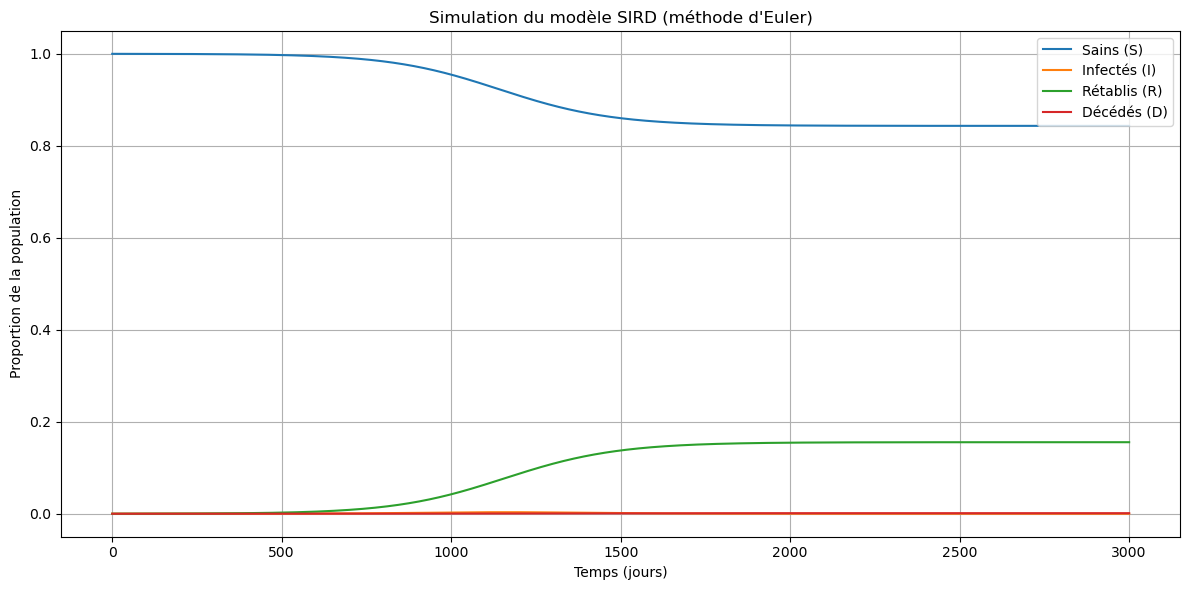

In [9]:
# Tracé
plt.figure(figsize=(12, 6))
plt.plot(resultats["temps"], resultats["S"], label="Sains (S)")
plt.plot(resultats["temps"], resultats["I"], label="Infectés (I)")
plt.plot(resultats["temps"], resultats["R"], label="Rétablis (R)")
plt.plot(resultats["temps"], resultats["D"], label="Décédés (D)")
plt.title("Simulation du modèle SIRD (méthode d'Euler)")
plt.xlabel("Temps (jours)")
plt.ylabel("Proportion de la population")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()